In [5]:
import whisper
from pytube import YouTube

Whisper has a variety of models of varying sizes. The large model will be more accurate but will also be more resource intensive.

In [6]:
model = whisper.load_model('base')

100%|███████████████████████████████████████| 139M/139M [00:16<00:00, 8.80MiB/s]


We will now instantiate a "YouYube" object by passing in the video URL.

In [14]:
url = "https://youtu.be/NT2H9iyd-ms"
yt_video = YouTube(url)

In [15]:
yt_video.title

'WATCH LIVE | Fed Chair Powell Discusses Latest Fed Rate Hike'

In [17]:
yt_video.streams

[<Stream: itag="17" mime_type="video/3gpp" res="144p" fps="7fps" vcodec="mp4v.20.3" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="137" mime_type="video/mp4" res="1080p" fps="30fps" vcodec="avc1.640028" progressive="False" type="video">, <Stream: itag="248" mime_type="video/webm" res="1080p" fps="30fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="136" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001f" progressive="False" type="video">, <Stream: itag="247" mime_type="video/webm" res="720p" fps="30fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="135" mime_type="video/mp4" res="480p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="vid

In [18]:
for stream in yt_video.streams:
    print(stream)

<Stream: itag="17" mime_type="video/3gpp" res="144p" fps="7fps" vcodec="mp4v.20.3" acodec="mp4a.40.2" progressive="True" type="video">
<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">
<Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">
<Stream: itag="137" mime_type="video/mp4" res="1080p" fps="30fps" vcodec="avc1.640028" progressive="False" type="video">
<Stream: itag="248" mime_type="video/webm" res="1080p" fps="30fps" vcodec="vp9" progressive="False" type="video">
<Stream: itag="136" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001f" progressive="False" type="video">
<Stream: itag="247" mime_type="video/webm" res="720p" fps="30fps" vcodec="vp9" progressive="False" type="video">
<Stream: itag="135" mime_type="video/mp4" res="480p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="video">
<St

In [20]:
streams = yt_video.streams.filter(only_audio=True)
print("Streams")
print(streams)
print(f"Number of streams: {len(streams)}")

Streams
[<Stream: itag="139" mime_type="audio/mp4" abr="48kbps" acodec="mp4a.40.5" progressive="False" type="audio">, <Stream: itag="140" mime_type="audio/mp4" abr="128kbps" acodec="mp4a.40.2" progressive="False" type="audio">, <Stream: itag="249" mime_type="audio/webm" abr="50kbps" acodec="opus" progressive="False" type="audio">, <Stream: itag="250" mime_type="audio/webm" abr="70kbps" acodec="opus" progressive="False" type="audio">, <Stream: itag="251" mime_type="audio/webm" abr="160kbps" acodec="opus" progressive="False" type="audio">]
Number of streams: 5


In [21]:
stream = streams.first()
print(stream)

<Stream: itag="139" mime_type="audio/mp4" abr="48kbps" acodec="mp4a.40.5" progressive="False" type="audio">


In [22]:
stream.download(filename="fed_meeting.mp4")

'/Users/ejb/Library/CloudStorage/OneDrive-Personal/Documents/projects/whisper/fed_meeting.mp4'

## Cleaning the file

Although we have downloaded the audio file which we will be working on there is an initial silence in the video of around ~6 minutes, which we will remove using `FFmpeg`.

In [28]:
!ffmpeg -ss 378 -i fed_meeting.mp4 -t 2715 fed_meeting_trimmed.mp4

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/concourse/worker/volumes/live/d5b9ea1c-8223-4ff6-7416-83e6b4cd6874/volume/ffmpeg_1587154914508/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehol --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilt

## Transcribing the audio

Now that we have trimmed the audio we are able to pass this into the model that we built with whisper.

In [29]:
transcription = model.transcribe("fed_meeting_trimmed.mp4")

/Users/ejb/opt/anaconda3/envs/whisper/lib/python3.8/site-packages/whisper/transcribe.py:78: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


The `transcription` will be a dictionary which will contain the `text` key for the entire transcription. The dictionary will also contain tokens from the text itself which can be accessed individually.

In [30]:
print(transcription['text'])

 Good afternoon. My colleagues and I are strongly committed to bringing inflation back down to our 2% goal. We have both the tools that we need and the resolve it will take to restore price stability on behalf of American families and businesses. Price stability is the responsibility of the Federal Reserve and serves as the bedrock of our economy. Without price stability, the economy does not work for anyone. In particular, without price stability, we will not achieve a sustained period of strong labor market conditions that benefit all. Today, the FOMC raised our policy interest rate by 75 basis points and we continue to anticipate that ongoing increases will be appropriate. We are moving our policy stance purposefully to a level that will be sufficiently restrictive to return inflation to 2%. In addition, we are continuing the process of significantly reducing the size of our balance sheet. Restoring price stability will likely require maintaining a restrictive stance of policy for s

## Combining Speech Data with Price Data

Having generated the transcription for the FOMC speech, we can see how the speech maps to the price of the S&P 500.

In [44]:
import pandas as pd

In [54]:
spy = pd.read_csv("spy.csv")

In [55]:
spy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      543 non-null    object 
 1   open      543 non-null    float64
 2   high      543 non-null    float64
 3   low       543 non-null    float64
 4   close     543 non-null    float64
 5   volume    543 non-null    float64
 6   average   543 non-null    float64
 7   barCount  543 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 34.1+ KB


In [56]:
spy.head()

,date,open,high,low,close,volume,average,barCount
0,2022-11-02 14:31:15,387.13,387.17,386.75,386.83,82173.0,386.884,444
1,2022-11-02 14:31:20,386.80,387.00,386.80,386.91,38918.0,386.913,234
2,2022-11-02 14:31:25,386.94,386.96,386.55,386.64,48165.0,386.749,232
3,2022-11-02 14:31:30,386.64,386.95,386.59,386.86,30688.0,386.760,190
4,2022-11-02 14:31:35,386.91,386.92,386.81,386.87,22270.0,386.862,130


The data that we have downloaded is the information for the S&P 500, updated every 5 seconds, and coincides with the time at which the speech was being streamed.

Using the segements of the `transcription` dictionary, we can assign a segment to each of these 5 second intervals.

In [57]:
for segment in transcription['segments']:
    second = int(segment['start'])
    second -= (second % 5)
    spy.loc[second/5, 'text'] = segment['text']

In [58]:
spy.head()

,date,open,high,low,close,volume,average,barCount,text
0,2022-11-02 14:31:15,387.13,387.17,386.75,386.83,82173.0,386.884,444,Good afternoon. My colleagues and I are stron...
1,2022-11-02 14:31:20,386.80,387.00,386.80,386.91,38918.0,386.913,234,We have both the tools that we need and the r...
2,2022-11-02 14:31:25,386.94,386.96,386.55,386.64,48165.0,386.749,232,NaN
3,2022-11-02 14:31:30,386.64,386.95,386.59,386.86,30688.0,386.760,190,Price stability is the responsibility of the ...
4,2022-11-02 14:31:35,386.91,386.92,386.81,386.87,22270.0,386.862,130,"Without price stability, the economy does not..."


Additionally, we can calculate the percentage change for each of these 5 second increments.

In [61]:
spy['percent'] = ((spy['close'] - spy['open']) / spy['open']) * 100

In [62]:
spy.head()

,date,open,high,low,close,volume,average,barCount,text,percent
0,2022-11-02 14:31:15,387.13,387.17,386.75,386.83,82173.0,386.884,444,Good afternoon. My colleagues and I are stron...,-0.077493
1,2022-11-02 14:31:20,386.80,387.00,386.80,386.91,38918.0,386.913,234,We have both the tools that we need and the r...,0.028438
2,2022-11-02 14:31:25,386.94,386.96,386.55,386.64,48165.0,386.749,232,NaN,-0.077531
3,2022-11-02 14:31:30,386.64,386.95,386.59,386.86,30688.0,386.760,190,Price stability is the responsibility of the ...,0.056900
4,2022-11-02 14:31:35,386.91,386.92,386.81,386.87,22270.0,386.862,130,"Without price stability, the economy does not...",-0.010338


However, as we can see from the DataFrame above, the percentage change in many of these instances is very small. We can therefore filter out more notable percentage changes and see what was said that could have effected this.

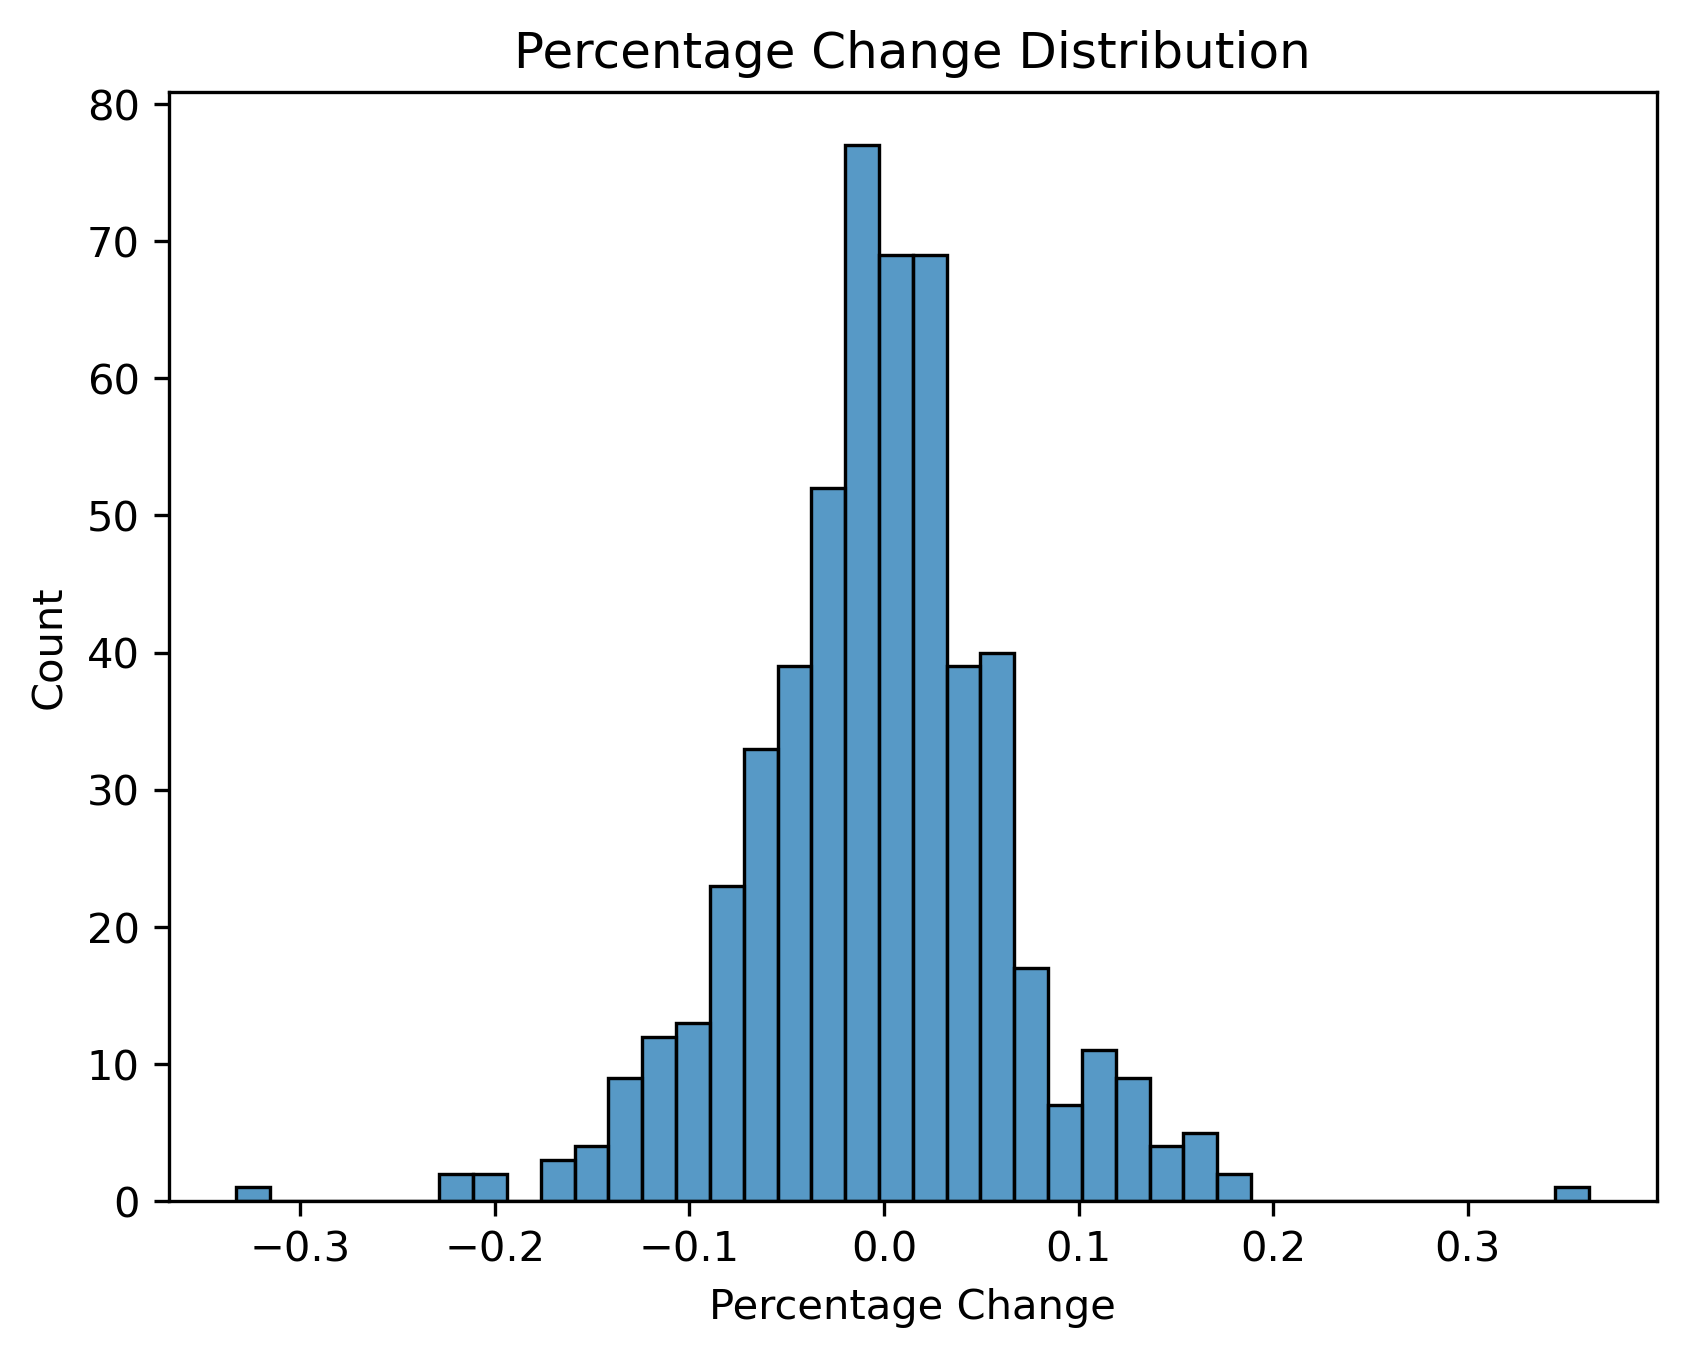

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(dpi=300)
plt.title("Percentage Change Distribution")
sns.histplot(x=spy['percent'])
plt.xlabel("Percentage Change")
plt.show()

We see that the percentage changes are somewhat normally distributed. We can arbitrarily set a threshold of 0.2 as constituting a big percentage change. That being said, a 20% change in 5 seconds is rather significant.

In [63]:
big_moves = spy[abs(spy['percent']) > 0.2]

In [68]:
big_moves

,date,open,high,low,close,volume,average,barCount,text,percent
61,2022-11-02 14:36:20,387.74,387.84,386.42,386.45,214600.0,387.037,1225,NaN,-0.332697
62,2022-11-02 14:36:25,386.40,386.44,385.36,385.52,289403.0,385.919,1731,"At some point, as I've said in the last two p...",-0.227743
78,2022-11-02 14:37:45,383.70,383.70,382.90,382.93,152778.0,383.279,805,"To conclude, we understand that our actions a...",-0.200678
93,2022-11-02 14:39:00,383.67,383.69,382.82,382.83,64429.0,383.275,405,How will we know that we've reached that level?,-0.218938
123,2022-11-02 14:41:30,383.53,384.97,383.37,384.92,151834.0,384.114,1044,"Of course, with the lags between policy and e...",0.362423
154,2022-11-02 14:44:05,385.86,385.87,385.07,385.08,73029.0,385.440,486,NaN,-0.202146


In [65]:
big_moves.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 61 to 154
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      6 non-null      object 
 1   open      6 non-null      float64
 2   high      6 non-null      float64
 3   low       6 non-null      float64
 4   close     6 non-null      float64
 5   volume    6 non-null      float64
 6   average   6 non-null      float64
 7   barCount  6 non-null      int64  
 8   text      4 non-null      object 
 9   percent   6 non-null      float64
dtypes: float64(7), int64(1), object(2)
memory usage: 528.0+ bytes


We see that there are 6 instances where we saw a "big move". Let us visualise these.

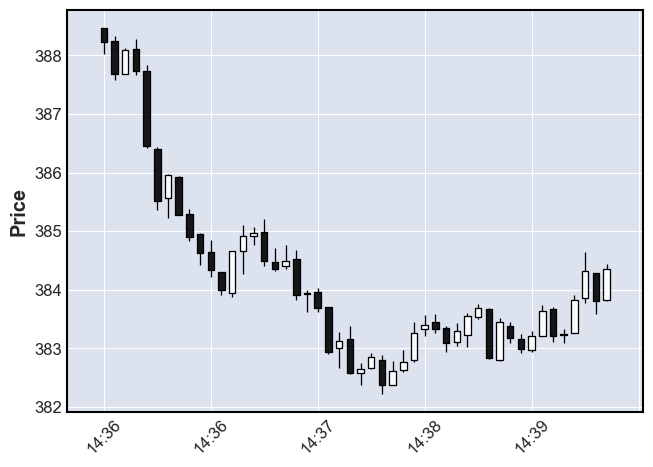

In [70]:
import mplfinance as mpf

df = spy
df.index = pd.DatetimeIndex(df['date'])

mpf.plot(df['2022-11-02 14:36':'2022-11-02 14:39'], type='candle')

What caused such a significant decline in price within such a few minutes? We can look at what was said prior to the changes in price.

In [76]:
indexes = big_moves.index

for index in indexes:
    print(spy[index-10:index]['text'].values)

[nan
 " With today's action, we've raised interest rates by 3 and 3-quarters percentage points this year."
 ' We anticipate that ongoing increases in the target range for the federal funds rate will be appropriate in order to attain a stance of monetary policy that is sufficiently restrictive to return inflation to 2% over time.'
 nan nan
 ' Financial conditions have tightened significantly in response to our policy actions, and we are seeing the effects on demand in the most interest rate sensitive sectors of the economy, such as housing.'
 nan
 ' It will take time, however, for the full effects of monetary restraint to be realized, especially on inflation.'
 " That's why we say in our statement that in determining the pace of future increases in the target range, we will take into account the cumulative tightening of monetary policy and the lags with which monetary policy affects economic activity and inflation."
 nan]
[" With today's action, we've raised interest rates by 3 and 3-qu

From this we see a number of statements that will have caused the price to change. For example, the first sentence that we printed was:

    "We anticipate that ongoing increases in the target range for the federal funds rate will be appropriate in order to attain a stance of monetary policy that is sufficiently restrictive to return inflation to 2% over time."
    
Although this notebook conducted some very simple analysis of text data, it shows the potential ways in which we can use machine learning models for financial analysis. 